In [9]:
%matplotlib notebook

import matplotlib.pyplot as plt
import datetime
from __future__ import division
from random import choice
from math import log, sqrt

<IPython.core.display.Javascript object>


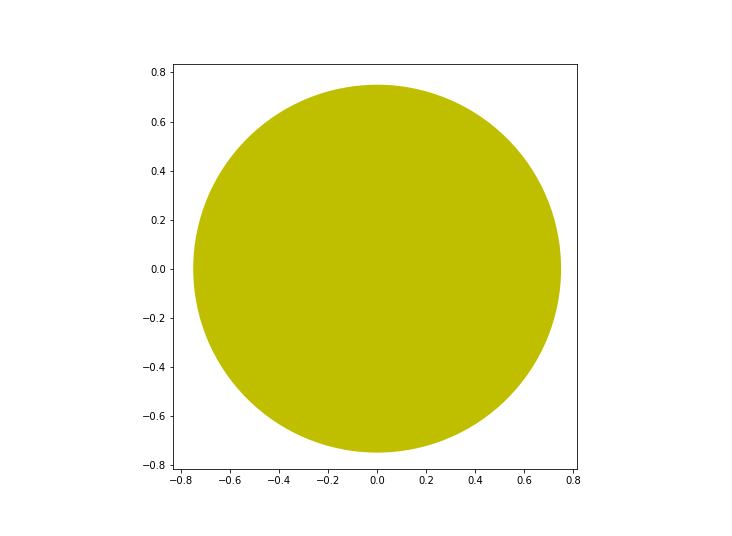

In [10]:
plt.axes()

circle = plt.Circle((0, 0), radius=0.75, fc='y')
plt.gca().add_patch(circle)

plt.axis('scaled')
plt.show()

In [12]:
class Board(object):
    def start(self):
        # Returns a representation of the starting state of the game.
        pass

    def next_state(self, state, play):
        # Takes the game state, and the move to be applied.
        # Returns the new game state.
        pass

    def legal_plays(self, state_history):
        # Takes a sequence of game states representing the full
        # game history, and returns the full list of moves that
        # are legal plays for the current player.
        pass

    def winner(self, state_history):
        # Takes a sequence of game states representing the full
        # game history.  If the game is now won, return the player
        # number.  If the game is still ongoing, return zero.  If
        # the game is tied, return a different distinct value, e.g. -1.
        pass

In [14]:
class MonteCarlo(object):
    def __init__(self, board, **kwargs):
        # Takes an instance of a Board and optionally some keyword
        # arguments.  Initializes the list of game states and the
        # statistics tables.
        self.board = board
        self.states = []
        seconds = kwargs.get('time', 30)
        self.calculation_time = datetime.timedelta(seconds=seconds)
        self.max_moves = kwargs.get('max_moves', 100)
        self.scores = {}
        self.plays = {}
        pass

    def update(self, state):
        # Takes a game state, and appends it to the history.
        self.states.append(state)
        pass

    def get_play(self):
        # Causes the AI to calculate the best move from the
        # current game state and return it.
        self.max_depth = 0
        state = self.states[-1]
        legal = self.board.legal_plays(self.states[:])

        # Bail out early if there is no real choice to be made.
        if not legal:
            return
        if len(legal) == 1:
            return legal[0]

        games = 0
        begin = datetime.datetime.utcnow()
        while datetime.datetime.utcnow() - begin < self.calculation_time:
            self.run_simulation()
            games += 1

        moves_states = [(p, self.board.next_state(state, p)) for p in legal]

        # Display the number of calls of `run_simulation` and the
        # time elapsed.
        print games, datetime.datetime.utcnow() - begin

        # Pick the move with the highest percentage of scores.
        percent_scores, move = max(
            (self.scores.get((S), 0) /
             self.plays.get((S), 1),
             p)
            for p, S in moves_states
        )

        # Display the stats for each possible play.
        for x in sorted(
            ((100 * self.scores.get((S), 0) /
              self.plays.get((S), 1),
              self.scores.get((S), 0),
              self.plays.get((S), 0), p)
             for p, S in moves_states),
            reverse=True
        ):
            print "{3}: {0:.2f}% ({1} / {2})".format(*x)

        print "Maximum depth searched:", self.max_depth

        return move

    def run_simulation(self):
        # Plays out a "random" game from the current position,
        # then updates the statistics tables with the result.
        
        # A bit of an optimization here, so we have a local
        # variable lookup instead of an attribute access each loop.
        plays, scores = self.plays, self.scores

        visited_states = set()
        states_copy = self.states[:]
        state = states_copy[-1]

        expand = True
        for t in xrange(1, self.max_moves + 1):
            legal = self.board.legal_plays(states_copy)
            moves_states = [(p, self.board.next_state(state, p)) for p in legal]

            if all(plays.get((S)) for p, S in moves_states):
                # If we have stats on all of the legal moves here, use them.
                log_total = log(
                    sum(plays[(S)] for p, S in moves_states)
                )
                value, move, state = max(
                    ((scores[(S)] / plays[(S)]) +
                     self.C * sqrt(log_total / plays[(S)]), p, S)
                    for p, S in moves_states
                )
            else:
                # Otherwise, just make an arbitrary decision.
                move, state = choice(moves_states)

            states_copy.append(state)

            if expand and (state) not in plays:
                expand = False
                plays[(state)] = 0
                scores[(state)] = 0
                if t > self.max_depth:
                    self.max_depth = t

            visited_states.add((state))

            winner = self.board.winner(states_copy)
            if winner:
                break

        for state in visited_states:
            if (state) not in plays:
                continue
            plays[(state)] += 1
            scores[(state)] += 1

SyntaxError: invalid syntax (<ipython-input-14-3164dcbc2a01>, line 43)

In [17]:
D = {}
D[1] = 1
print(D.get(1,10))
print(D.get(2,10))

1
10
